In [1]:
import os
import opsimsummary as oss
import healpy as hp
from opsimsummary import SynOpSim
import numpy as np
import matplotlib.pyplot as plt
import astropy.coordinates as coord
import astropy.units as u
import pickle
from astropy.time import Time

## OpSim database

In [2]:
myopsimv3 = '../data/OpSim_databases/baseline_v3.0_10yrs.db'

In [3]:
import sqlite3
# db_name = '../data/baseline_v2.0_10yrs.db'
db_name = '../data/OpSim_databases/baseline_v3.0_10yrs.db'
# db_name = '../data/baseline_v2.0_10yrs.db'
connection = sqlite3.connect(db_name)
c = connection.cursor()

c.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(c.fetchall())
print(" ")

c.execute("pragma table_info(Proposal)")
print(c.fetchall())
print(" ")

c.execute("pragma table_info(observations)")
print(c.fetchall())
print(" ")

c.execute("select * from observations limit 1")
print(c.fetchall())
print(" ")
c.execute("select fieldRA from observations limit 10")
print("RA: ")
print(c.fetchall())
print(" ")
c.execute("select fieldDec from observations limit 10")
print("Dec: ")
print(c.fetchall())
print(" ")

c.execute("select proposalId from observations limit 100")
print("ProposalId: ")
print(c.fetchall())
print(" ")

c.execute("select observationId from observations limit 100")
print("observationId: ")
print(c.fetchall())
print(" ")

c.execute("select * from Proposal limit 20")
print("Proposal info: ")
print(c.fetchall())
print(" ")

c.execute("select fieldDec from observations")
print("Number of observations: ", len(c.fetchall()))
# 2 million

[('observations',), ('info',)]
 
[]
 
[(0, 'observationId', 'INTEGER', 0, None, 0), (1, 'fieldRA', 'REAL', 0, None, 0), (2, 'fieldDec', 'REAL', 0, None, 0), (3, 'observationStartMJD', 'REAL', 0, None, 0), (4, 'flush_by_mjd', 'REAL', 0, None, 0), (5, 'visitExposureTime', 'REAL', 0, None, 0), (6, 'filter', 'TEXT', 0, None, 0), (7, 'rotSkyPos', 'REAL', 0, None, 0), (8, 'rotSkyPos_desired', 'REAL', 0, None, 0), (9, 'numExposures', 'INTEGER', 0, None, 0), (10, 'airmass', 'REAL', 0, None, 0), (11, 'seeingFwhm500', 'REAL', 0, None, 0), (12, 'seeingFwhmEff', 'REAL', 0, None, 0), (13, 'seeingFwhmGeom', 'REAL', 0, None, 0), (14, 'skyBrightness', 'REAL', 0, None, 0), (15, 'night', 'INTEGER', 0, None, 0), (16, 'slewTime', 'REAL', 0, None, 0), (17, 'visitTime', 'REAL', 0, None, 0), (18, 'slewDistance', 'REAL', 0, None, 0), (19, 'fiveSigmaDepth', 'REAL', 0, None, 0), (20, 'altitude', 'REAL', 0, None, 0), (21, 'azimuth', 'REAL', 0, None, 0), (22, 'paraAngle', 'REAL', 0, None, 0), (23, 'cloud', 'REAL'

OperationalError: no such table: Proposal

In [4]:
c.execute("select fieldRA from observations limit 900000")  # 900000
ra = c.fetchall()

c.execute("select fieldDec from observations limit 900000")
dec = c.fetchall()



In [24]:
print(min(ra))

ra_ = coord.Angle(ra * u.degree)
dec_ = coord.Angle(dec * u.degree)

ra_2 = ra_.wrap_at(180 * u.deg)

ra1, dec1 = [], []

for i in range(len(ra)):
    ra1.append(float(ra[i][0]))
    dec1.append(float(dec[i][0]))
    
ra1 = np.array(ra1) * np.pi / 180
dec1 = np.array(dec1) * np.pi / 180


ra2 = np.array(ra) * np.pi / 180
dec2 = np.array(ra) * np.pi / 180
ra2 -= np.pi

print(min(ra2), max(ra2))
print(min(dec2), max(dec2))

print(len(ra_))

(0.0009486282671621779,)
[-3.1415761] [3.14157285]
[1.65566866e-05] [6.28316551]
900000


(array([39014., 29599., 37861., 32684., 45153., 36630., 31248., 27438.,
        26483., 25496., 26560., 27093., 57937., 30255., 29505., 31079.,
        28850., 28570., 28819., 25894., 19562., 25256., 25949., 25930.,
        25983., 25946., 25517., 25926., 26362., 27401.]),
 array([1.65566866e-05, 2.09454855e-01, 4.18893153e-01, 6.28331452e-01,
        8.37769750e-01, 1.04720805e+00, 1.25664635e+00, 1.46608464e+00,
        1.67552294e+00, 1.88496124e+00, 2.09439954e+00, 2.30383784e+00,
        2.51327614e+00, 2.72271443e+00, 2.93215273e+00, 3.14159103e+00,
        3.35102933e+00, 3.56046763e+00, 3.76990593e+00, 3.97934422e+00,
        4.18878252e+00, 4.39822082e+00, 4.60765912e+00, 4.81709742e+00,
        5.02653572e+00, 5.23597401e+00, 5.44541231e+00, 5.65485061e+00,
        5.86428891e+00, 6.07372721e+00, 6.28316551e+00]),
 <BarContainer object of 30 artists>)

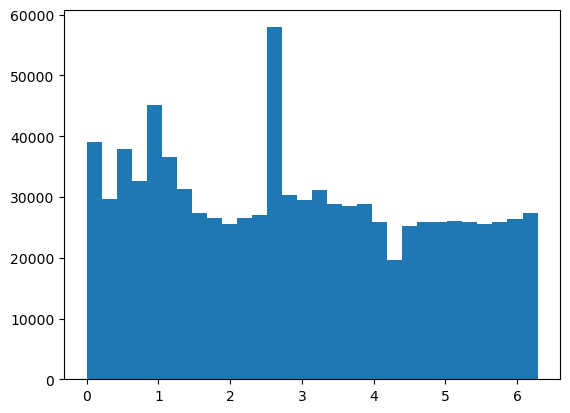

In [60]:
plt.hist(ra1, bins=30)

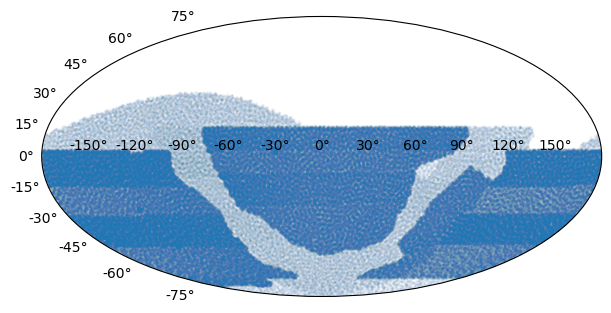

In [65]:
fig = plt.figure(figsize=(16, 8))
ax1 = fig.add_subplot(221, projection="mollweide")
im1 = ax1.scatter(ra_.radian - np.pi, dec_.radian, s=1, label="Excluded", alpha=0.01)

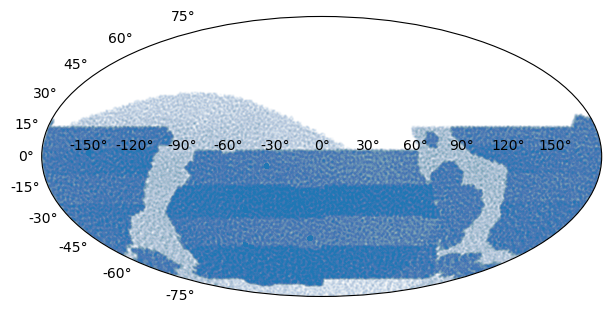

In [25]:
fig = plt.figure(figsize=(16, 8))
ax1 = fig.add_subplot(221, projection="mollweide")
im1 = ax1.scatter(- ra_2.radian, dec_.radian, s=1, label="Excluded", alpha=0.01)  # - ra_2.radian

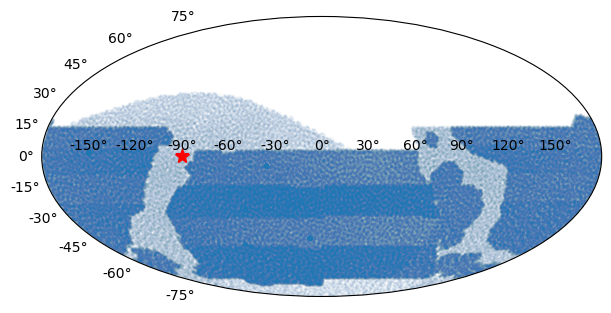

In [44]:
fig = plt.figure(figsize=(16, 8))
ax1 = fig.add_subplot(221, projection="mollweide")
im1 = ax1.scatter(- ra_2.radian, dec_.radian, s=1, label="Excluded", alpha=0.01, zorder=1)
ax1.plot([-90/180*np.pi], [0/180*np.pi], "*", ms=10, color='red', zorder=4)

## OpSim Summary

In [4]:
synopsim = SynOpSim.fromOpSimDB(myopsimv3, opsimversion='fbsv2', usePointingTree=True, use_proposal_table=False,
                               subset='unique_all')

 reading from database sqlite:///../data/OpSim_databases/baseline_v3.0_10yrs.db
We have filterNull set to False
checking that summary table read in

Reading in raw tables successful
replacing names works
dropping duplicates works
dithered column names exists 
Changing units for fbsv2 from degrees


In [5]:
ra = [54.0, 52.0, 89.2, 14.0]
dec = [-27.5, -23.0, -10.5, 46.8]

In [6]:
gen = synopsim.pointingsEnclosing(ra, dec, circRadius=0., pointingRadius=1.75, 
                                  usePointingTree=True)

In [7]:
next(gen)

check using ptree True


,fieldRA,fieldDec,expMJD,flush_by_mjd,visitExposureTime,filter,rotSkyPos,rotSkyPos_desired,numExposures,airmass,...,moonRA,moonDec,moonDistance,solarElong,moonPhase,cummTelAz,scripted_id,_ra,_dec,intindex
obsHistID,,,,,,,,,,,,,,,,,,,,,
1713389,53.405394,-29.126014,63233.206606,63233.237139,30.0,i,289.828755,289.828755,2,1.400908,...,150.520088,7.471841,99.820960,110.089741,72.665850,-37.386658,0,0.932100,-0.508345,1713389
1713439,53.405394,-29.126014,63233.230586,63233.237139,30.0,z,289.828755,289.828755,2,1.614320,...,150.703579,7.387588,99.940957,110.074222,72.567977,-35.542673,0,0.932100,-0.508345,1713439
1486236,53.491992,-29.124016,62832.229232,62832.262786,30.0,g,224.679320,224.679320,2,1.072729,...,272.004714,-20.380652,118.115759,129.063039,15.260199,-56.359598,0,0.933611,-0.508310,1486236
1274404,53.491032,-29.111752,62473.220794,62473.261999,30.0,g,264.074508,264.074508,2,1.093812,...,214.270668,-16.977886,130.312454,126.588870,18.529892,-15.255673,0,0.933595,-0.508096,1274404
1274454,53.491032,-29.111752,62473.244868,62473.261999,30.0,r,264.074508,264.074508,2,1.171223,...,214.719283,-17.104267,130.355212,126.578414,18.295124,-14.575043,0,0.933595,-0.508096,1274454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723740,55.077295,-26.152086,63253.106508,63253.143987,30.0,z,287.201439,287.201439,2,1.151373,...,59.250852,19.765866,46.096356,99.319554,66.707531,-88.503711,0,0.961280,-0.456440,1723740
1723790,55.077295,-26.152086,63253.130595,63253.143987,30.0,y,287.201439,287.201439,2,1.255698,...,59.459509,19.778584,46.127262,99.302206,66.802066,-87.100990,0,0.961280,-0.456440,1723790
467030,55.235196,-26.230611,61053.120279,61053.151217,30.0,r,264.604471,264.604471,2,1.117750,...,226.104110,-21.563650,131.393227,105.419972,34.944152,-89.701695,0,0.964036,-0.457811,467030


In [8]:
obs = next(gen)
obs = obs.sort_values(by=['expMJD'])

In [9]:
obs.keys()

Index(['fieldRA', 'fieldDec', 'expMJD', 'flush_by_mjd', 'visitExposureTime',
       'filter', 'rotSkyPos', 'rotSkyPos_desired', 'numExposures', 'airmass',
       'seeingFwhm500', 'FWHMeff', 'seeingFwhmGeom', 'filtSkyBrightness',
       'night', 'slewTime', 'visitTime', 'slewDistance', 'fiveSigmaDepth',
       'altitude', 'azimuth', 'paraAngle', 'cloud', 'moonAlt', 'sunAlt',
       'note', 'fieldId', 'proposalId', 'block_id', 'observationStartLST',
       'rotTelPos', 'rotTelPos_backup', 'moonAz', 'sunAz', 'sunRA', 'sunDec',
       'moonRA', 'moonDec', 'moonDistance', 'solarElong', 'moonPhase',
       'cummTelAz', 'scripted_id', '_ra', '_dec', 'intindex'],
      dtype='object')

In [10]:
lim_mag = obs['fiveSigmaDepth']
filters = obs['filter']
days = obs['expMJD']
psf = obs['seeingFwhmGeom']

print("Observation MJD: ")
print(days)
print(" ")
print("Observation filters:")
print(filters)
print(" ")
print("Limiting magnitude: ")
print(lim_mag)
print(" ")
print("PSF: ")
print(psf)

Observation MJD: 
obsHistID
6782       60226.375173
10995      60231.369987
11020      60231.381340
13786      60235.327162
13836      60235.350231
               ...     
1974632    63689.987324
1974645    63689.990437
2078200    63853.409394
2083328    63865.244989
2083378    63865.270117
Name: expMJD, Length: 852, dtype: float64
 
Observation filters:
obsHistID
6782       y
10995      y
11020      y
13786      y
13836      y
          ..
1974632    r
1974645    r
2078200    z
2083328    r
2083378    i
Name: filter, Length: 852, dtype: object
 
Limiting magnitude: 
obsHistID
6782       22.380135
10995      22.178418
11020      21.785993
13786      22.412942
13836      22.294599
             ...    
1974632    22.907708
1974645    22.959580
2078200    22.039725
2083328    24.309941
2083378    23.726723
Name: fiveSigmaDepth, Length: 852, dtype: float64
 
PSF: 
obsHistID
6782       0.665963
10995      0.776964
11020      0.680170
13786      0.695811
13836      0.746359
             ... 

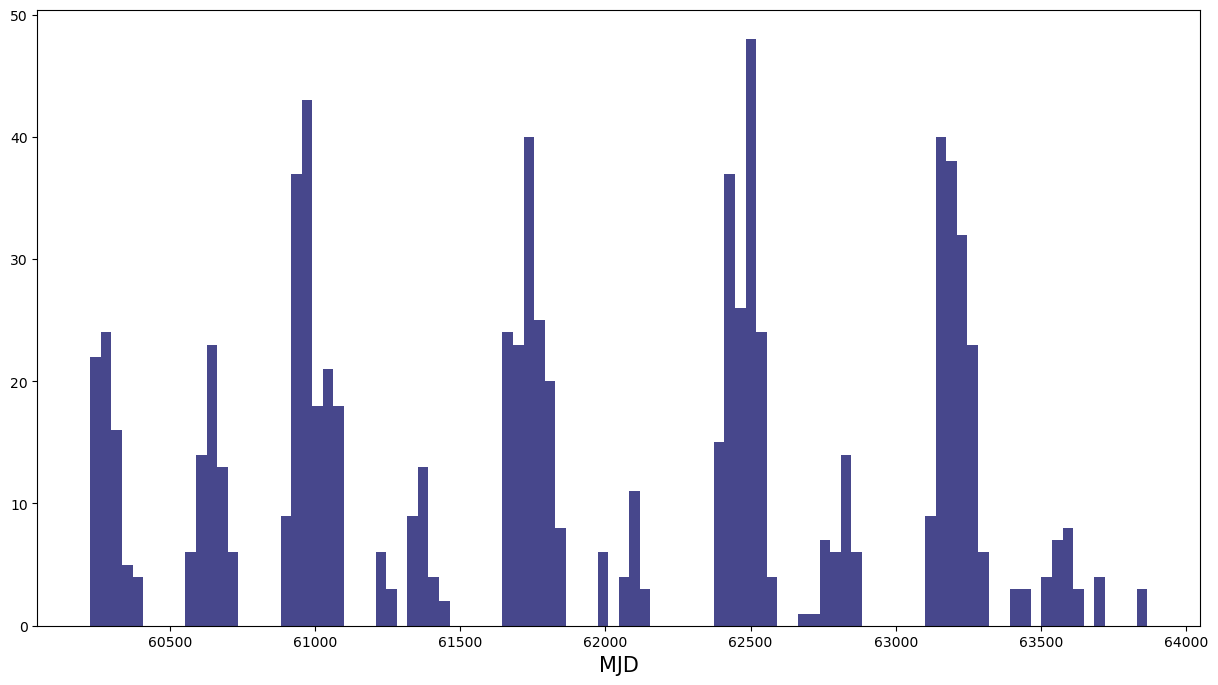

In [11]:



plt.figure(figsize=(15, 8))
plt.hist(days, bins=100, color='midnightblue', alpha=0.8)
plt.xlabel("MJD", fontsize=15)
plt.show()

# dates? close in winter?

## Sample full LSST footprint

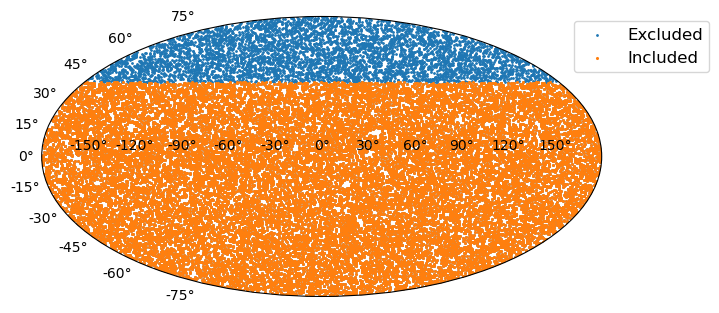

In [12]:
# Input coordinates (DEC between -90 and 40)

def radians(degrees):
    return degrees / 180 * np.pi

N = 30000

# Sample random points on a sphere
ra_points = np.random.uniform(low=-180, high=180, size=N)
dec_points = np.arcsin(2 * np.random.uniform(size=N) - 1) / np.pi * 180

fig = plt.figure(figsize=(16, 8))
ax1 = fig.add_subplot(221, projection="mollweide")
im1 = ax1.scatter(radians(ra_points), radians(dec_points), s=1, label="Excluded")

dec_selection = (dec_points > -90) & (dec_points < 40)
ra_points = ra_points[dec_selection]
dec_points = dec_points[dec_selection]
im1 = ax1.scatter(radians(ra_points), radians(dec_points), s=1.5, label="Included")
plt.legend(loc=(0.95, 0.8), fontsize=12)

ra_points += 180

In [13]:
gen = synopsim.pointingsEnclosing(ra_points, dec_points, circRadius=0., pointingRadius=1.75, 
                                  usePointingTree=True)

In [14]:
# Loop through all pointings and save the ones that are in the LSST footprint

opsim_ra_list, opsim_dec_list = [], []

for p in range(len(ra_points)):
    
    obs = next(gen)
    
    opsim_ra = np.mean(obs['fieldRA'])
    opsim_dec = np.mean(obs['fieldDec'])

    if np.isnan(opsim_ra) or np.isnan(opsim_dec):
        continue
    
    opsim_ra_list.append(opsim_ra)
    opsim_dec_list.append(opsim_dec)
    
opsim_ra_list = np.array(opsim_ra_list)
opsim_dec_list = np.array(opsim_dec_list)
opsim_ra_list -= 180

check using ptree True


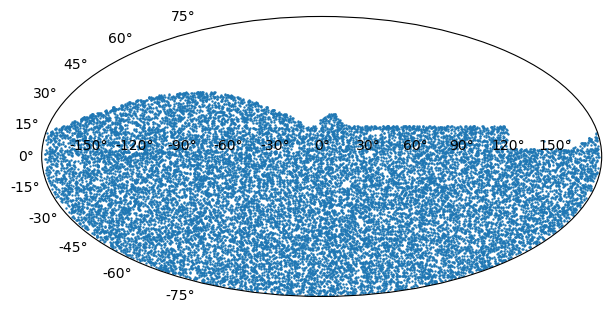

In [15]:
fig = plt.figure(figsize=(16, 8))
ax1 = fig.add_subplot(221, projection="mollweide")
im1 = ax1.scatter(radians(opsim_ra_list), radians(opsim_dec_list), s=0.5)